Modelo de una epidemia de Dengue en Colima y Manzanillo 

El modelo:
$
   dS = \mu N - a p11 \beta S Iv/Neff1 - \mu S - p12 \beta a2 S Iv2/Neff2 \\
   dE = a p11 \beta S Iv/Neff1 - (\mu + \nu) E + p12 \beta a2 S Iv2/Neff2 \\
   dI = \nu E - (\mu + \gamma) I \\
   dR = \gamma I - \mu R \\
   dSv = \mu_v (Nv - q Iv) - p11 a\beta Sv I/Neff1 - (\mu_v + \delta) Sv - p21 a \beta Sv I2/Neff1 \\
   dEv = p11 a \beta Sv I/Neff1  - (\nu_v + \mu_v) Ev + p21 a \beta Sv I2/Neff1 \\
   dIv = \nu_v Ev + q \mu_v Iv - \nu_v Iv \\
   \\
   dS2 = \mu_2 N2 - p22 a2 \beta S2 Iv2/Neff2 - \mu_2 S2 - p21 \beta a S2 Iv/Neff1 \\
   dE2 = p22 a2 \beta S2 Iv2/Neff2 - (\mu_2 + \nu_2) E2  + p21 \beta a S2 Iv/Neff1 \\
   dI2 = \nu_2 E2 - (\mu_2 + \gamma_2) I2 \\
   dR2 = \gamma_2 I2 - \mu_2 R2 \\
   dSv2 = \mu_v2 (Nv2 - q2 Iv2) - p22 a2 \beta Sv2 I2/Neff2 - (\mu_v2 + \delta_2) Sv2 - p12 a2 \beta Sv2 I/Neff2 \\
   dEv2 = p22 a2 \beta Sv2 I2/Neff2 - (\nu_v2 + \mu_v2) Ev2 + p12 a2 \beta Sv2 I/Neff2 \\
   dIv2 = \nu_v2 Ev2 - \nu_v2 Iv2 + q2 \mu_v2 Iv2\\
 $

In [18]:
from scipy.integrate import odeint
import numpy as np
import model_epi as mod # the two patch model
import matplotlib.pyplot as plt

In [19]:
#parameteres
param = np.zeros(24)
param[0] = mu = 0.0 # Humand bird and dead rate 0.014 -> 70 years life expentancy
param[1] = beta1 = 0.43*7.0 # 0.43 # bite rate per mosquito 0.2 - 0.67
param[2] = a =1.0 # 
param[3] = nu = 0.18*7.0 # expose transition rate 4-7 days
param[4] = gamma = 0.2*7.0 # recovery rate 5 days
param[5] = muv = 0.03 #Mparam.epsilon #####
param[6] = nuv = (1.0/10.0)  # 8 - 12 days 
param[7] = delta = 0.0
param[8] = q = 0.0 ### 0.0

param[12] = mu2 = mu
param[13] = beta2 = beta1
param[14] = a2 = a
param[15] = nu2 = nu
param[16] = gamma2 = gamma
param[17] = muv2 = 0.03 #Mparam2.epsilon
param[18] = nuv2 = nuv
param[19] = delta2 = delta
param[20] = q2 = q #q

p11 = 0.999495370 #0.997066733
p22 = 1.0

In [20]:
#initial conditions
y = np.zeros(16)
S = y[0] = 1355 #1356.0 #N1 = 1356.0 #= 3700.0 # prop1*Kv1 #25.19*Kv # 20.0*Kv  # 125,143 manzanillo en el 2000;  92,863 manzanillo en 1990
E = y[1] = 0.0
I = y[2] = 11.0 #I1 =0.0 #= 11
R = y[3] = 0.0
Sv = y[4] = 308 #303 #308 #Nv = 308.0
Ev = y[5] = 0.0
Iv = y[6] = 0.0

S2 = y[7] = 1184 #1234.0 #=1 # prop2*Kv2  # 129,958 colima en el 2000
E2 = y[8] = 0.0
I2 = y[9] = 0.0 #I2ini
R2 = y[10] = 0.0
Sv2 = y[11] = 738 #732.0 # 446.0
Ev2 = y[12] = 0.0
Iv2 = y[13] = 0.0


In [21]:
time = np.linspace(0.0,50.0,1000)

In [22]:
def deriv(estate,t):
	return mod.TwoPatch(estate,param,p11,p22)

In [23]:
y_evol = odeint(deriv,y,time)

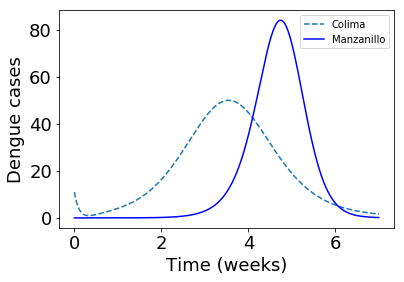

In [52]:
plt.xlabel('Time (weeks)')
plt.ylabel('Dengue cases')
plt.plot(time,y_evol[:,2],'--',label="Colima")
plt.plot(time,y_evol[:,9],'b',label="Manzanillo")
plt.legend()
plt.show()

Abejas anarquistas

Modelo:

$
     \frac{dW}{dt} = \beta (1.0-\rho) W + \beta \delta A - \mu N W - \alpha N W - \gamma A W/(1.0 + \rho W)  \\
    \frac{dA}{dt} = \alpha N W - \mu N A 
   $
    

In [42]:
from scipy.integrate import odeint
import numpy as np
import model_bees as mod # the model
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)
matplotlib.rc('axes', labelsize=18)

In [43]:
mu = 0.005
b = sqrt(2000.0*mu)  # 2000 eggs/day max!
d = 0.85
alpha = (1/1000.0)*b*0.9 #0.1*mu
rho = 0.0000

#parameteres
param = np.zeros(5)
param[0] = b
param[1] = d
param[2] = mu
param[3] = alpha
param[4] = rho

In [44]:
#initial conditions
y = np.zeros(2)
y[0]= W = 5.0
y[1]= A = 2.0

In [45]:
time = np.linspace(0.0,7.0,1000)

In [46]:
def deriv1(estate,t):
    param[4] = rho = 0.0
    return mod.Complete(estate,param)

def deriv2(estate,t):
    param[4] = rho = 0.006
    return mod.Complete(estate,param)

In [47]:
y_evol1 = odeint(deriv1,y,time)
y_evol2 = odeint(deriv2,y,time)

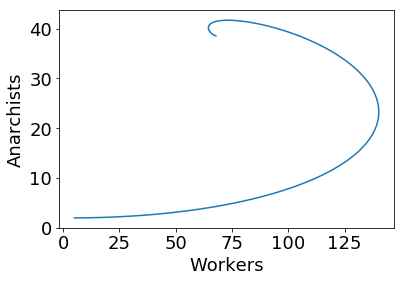

In [48]:
plt.figure(2)
plt.xlabel('Workers')
plt.ylabel('Anarchists')
plt.plot(y_evol1[:,0],y_evol1[:,1])
plt.show()

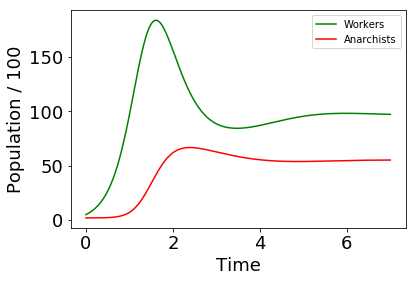

In [49]:
plt.figure(3)
plt.xlabel('Time')
plt.ylabel('Population / 100')
plt.plot(time,y_evol2[:,0],'g',label='Workers')
plt.plot(time,y_evol2[:,1],'r',label='Anarchists')
plt.legend()
plt.show()

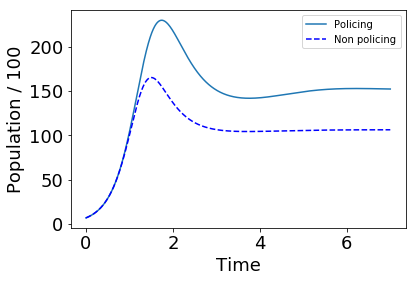

In [50]:
plt.figure(4)
plt.xlabel('Time')
plt.ylabel('Population / 100')
plt.plot(time,y_evol2[:,0] + y_evol2[:,1],label='Policing')
plt.plot(time,y_evol1[:,0] + y_evol1[:,1],'b--',label='Non policing')
plt.legend()
plt.show()

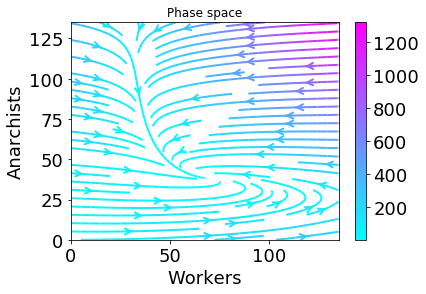

In [51]:
from matplotlib.pyplot import cm

def vector(X,Y):
    param[4] = rho = 0.0
    estate = np.array([Y,X])
    return mod.Complete(estate,param)

Y, X = np.mgrid[0:150:15, 0:150:15]
U = vector(Y,X)[0]
V = vector(Y,X)[1]
speed = np.sqrt(U**2 + V**2) + 0.1
UN = U/speed
VN = V/speed


plot5 = plt.figure(5)
plt.streamplot(X, Y, U, V,          # data
               color=speed,         # array that determines the colour
               cmap=cm.cool,        # colour map
               linewidth=2,         # line thickness
               arrowstyle='->',     # arrow style
               arrowsize=1.5)       # arrow size

plt.colorbar()                      # add colour bar on the right
plt.xlabel('Workers')
plt.ylabel('Anarchists')
plt.title('Phase space')
plt.show(plot5)                     # display the plot
